# Libraries

All the functions are implement in ```functions.py``` file.

In [3]:
from functions import *
import pandas as pd

# Download original dataset

The images are avaible in Google Drive link.

In [5]:
# download_and_extract_gdrive_zip("1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp")

# Get contours

In [6]:
_ = process_images_to_json('dataset/binary-masks', 'dataset_contours_aggregate', 'dataset//binary_patchs')

Contours by file extracted and saved to dataset_contours_aggregate_by_image.json
Contours cropped and saved to dataset//binary_patchs.
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.json
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.csv with 7039 samples.


# Clean "strange" contours

What are "strange contours"?

- non-convex
- multiple contours

### Multiple contours

In [ ]:
purge_1 = find_multipolygon_contours(r'C:\git-projetos\chloride_ingress_probabilistic_model\dataset_contours_aggregate_by_patch_filtered.json')

### Non-convex

In [ ]:
# Luiz colocar aqui o purge
purge_2 = ["aqui nossa lista manual"]
purge = purge_1 + purge_2

# Plot one sample of the dataset

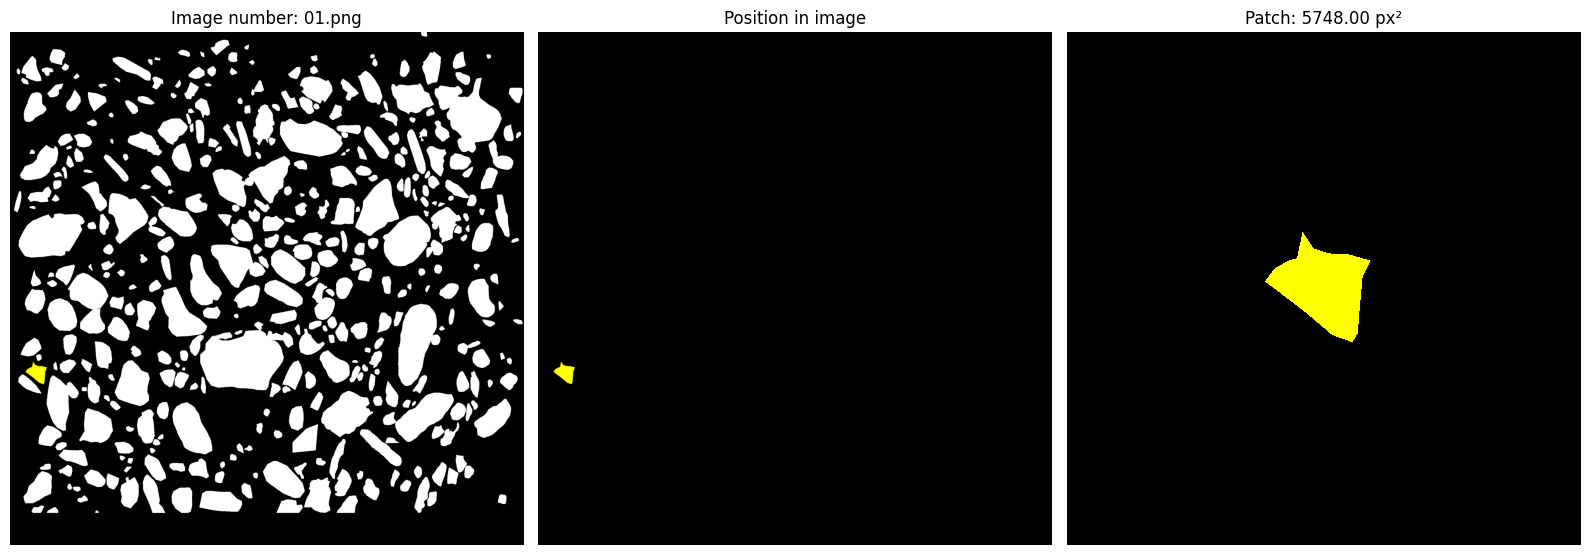

In [7]:
plot_contours_from_json("dataset_contours_aggregate_by_image.json", keys_to_plot=["01.png"]) 

# Filter contours

In [8]:
filter_images_by_diameter(threshold_diam_mm=15.0)


Images with diameter < 15.0 mm copied to: dataset/binary_patchs_filtered
Total images copied: 7038
Total images removed (>= 15.0 mm): 1
Filtered CSV saved to: dataset_contours_aggregate_by_patch_filtered.csv
Filtered contours JSON saved to: dataset_contours_aggregate_by_patch_filtered.json


# Statistics

In [9]:
df = pd.read_csv("dataset_contours_aggregate_by_patch_filtered.csv")
df.head()

,image_name,area (px),area (mm2),diameter (px),diameter (mm)
0,01_0.png,144.0,0.12960,18.384977,0.551549
1,01_1.png,1020.0,0.91800,55.927624,1.677829
2,01_2.png,1445.0,1.30050,65.551704,1.966551
3,01_3.png,6132.5,5.51925,130.816864,3.924506
4,01_4.png,5463.0,4.91670,123.988098,3.719643


In [10]:
df.describe()

,area (px),area (mm2),diameter (px),diameter (mm)
count,7038.000000,7038.000000,7038.000000,7038.000000
mean,4402.664677,3.962398,87.325329,2.619760
std,7101.609831,6.391449,62.182741,1.865482
min,0.000000,0.000000,3.162478,0.094874
25%,858.125000,0.772312,44.772216,1.343166
50%,1891.750000,1.702575,68.646641,2.059399
75%,4557.250000,4.101525,107.032810,3.210984
max,96149.000000,86.534100,486.319031,14.589571


In [ ]:
df

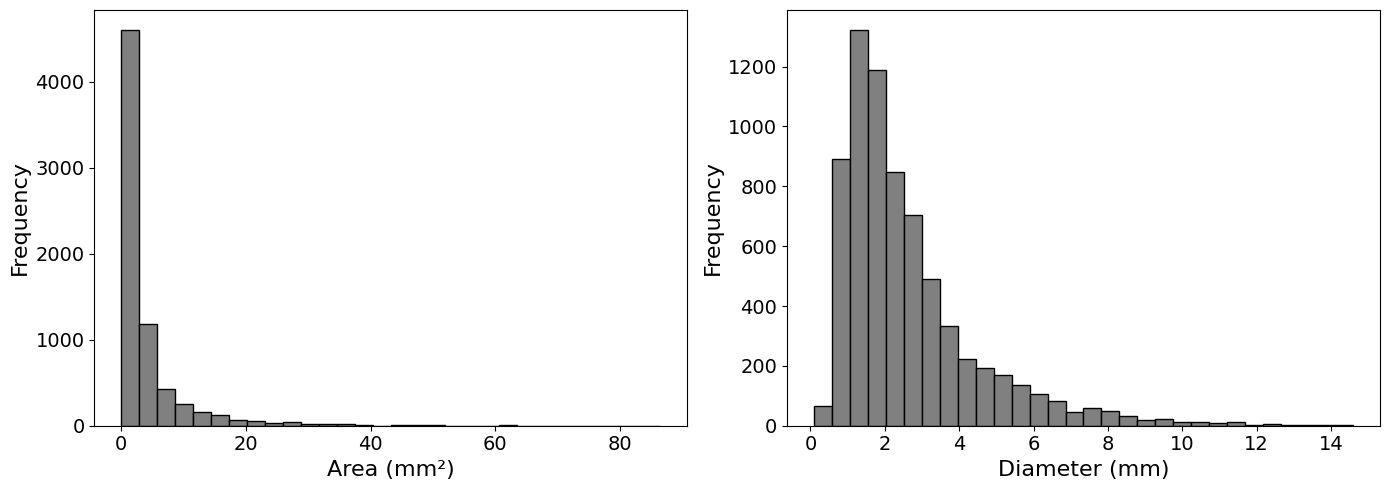

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['area (mm2)'], bins=30, color='gray', edgecolor='black')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].hist(df['diameter (mm)'], bins=30, color='gray', edgecolor='black')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('frequency_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

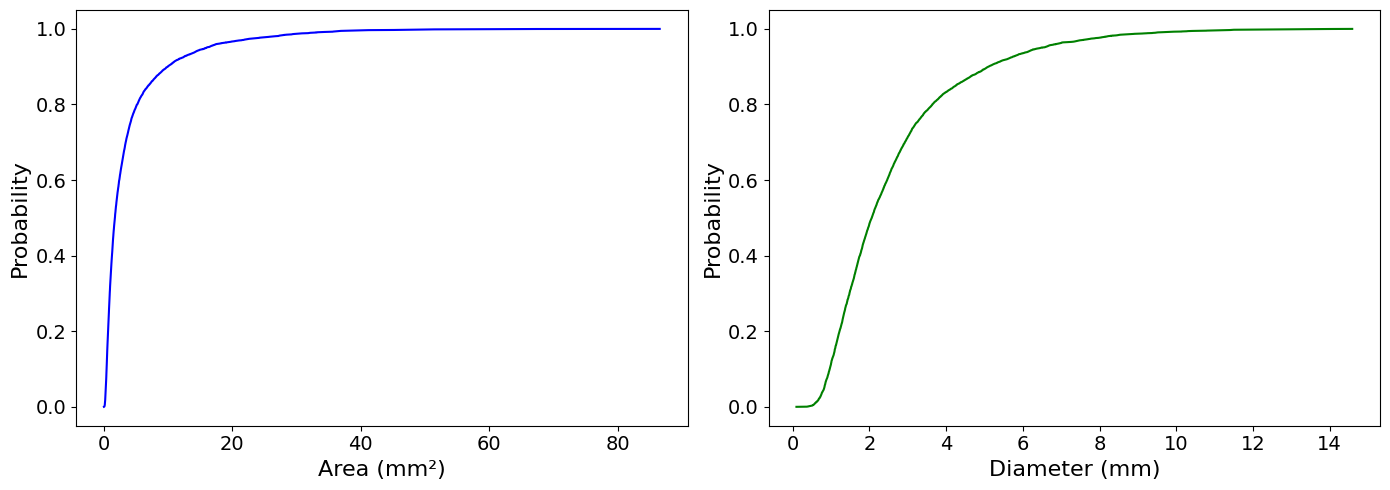

In [12]:
area_sorted, area_cdf = obtain_cdf(list(df['area (mm2)']))
diameter_sorted, diameter_cdf = obtain_cdf(list(df['diameter (mm)']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(area_sorted, area_cdf, color='blue')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Probability", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].plot(diameter_sorted, diameter_cdf, color='green')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Probability", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('Probability_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()